## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [3]:
dados = pd.read_csv('housing.csv')
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
matriz_corr = dados.corr(numeric_only=True)
matriz_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [5]:
mapping = {
    'NEAR BAY':1,
    '<1h OCEAN':2,
    'INLAND':3,
    'NEAR OCEAN':4,
    'ISLAND':5,
}
dados['ocean_proximity_numeric']= dados['ocean_proximity'].map(mapping)

dados['ocaen_proximity']= dados['ocean_proximity'].map(mapping)
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric,ocaen_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,1.0


In [6]:
X = dados[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'ocean_proximity_numeric']]
y = dados['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [7]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [8]:
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_test, regr_1.predict(X_test))

template = 'O MSE da arvore com profundidade = {0} é: {1:2f}'

print(template.format(regr_1.get_depth(),mse1).replace(".", ","))
print(template.format(regr_2.get_depth(),mse2).replace(".", ","))

O MSE da arvore com profundidade = 2 é: 7477784839,014400
O MSE da arvore com profundidade = 8 é: 7993625857,329594


In [9]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [10]:
r_quadrado1 = regr_1.score(X_train, y_train)
r_quadrado2 = regr_2.score(X_test, y_test)

template = 'O r-quadrado da arvore com profundidade= {0} é: {1:2}'

print(template.format(regr_1.get_depth(), r_quadrado1).replace(".", ","))
print(template.format(regr_2.get_depth(), r_quadrado2).replace(".", ","))

O r-quadrado da arvore com profundidade= 2 é: 0,3299628009862797
O r-quadrado da arvore com profundidade= 8 é: 0,4051912537910769


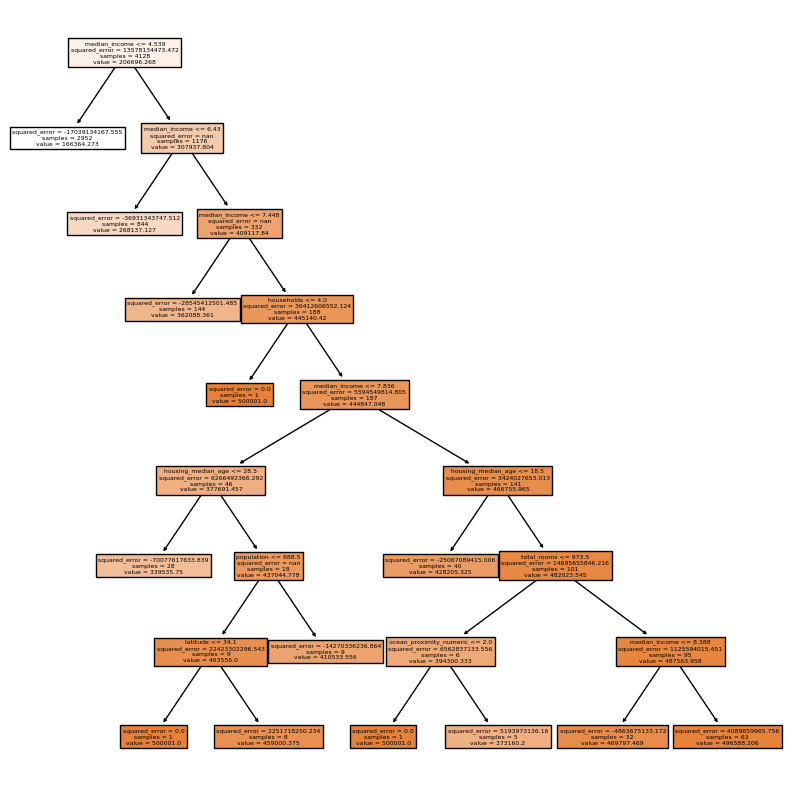

In [11]:
plt.figure(figsize= (10, 10))
plot_tree(regr_2,
          feature_names= X.columns,
          filled= True)
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.16720399e+08, 1.55649275e+09, 3.95000331e+09]),
 'impurities': array([7.52662072e+09, 7.74334112e+09, 9.29983387e+09, 1.32498372e+10])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [13]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_score = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_score = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0, 0.5, 'Profundidade da árvore')

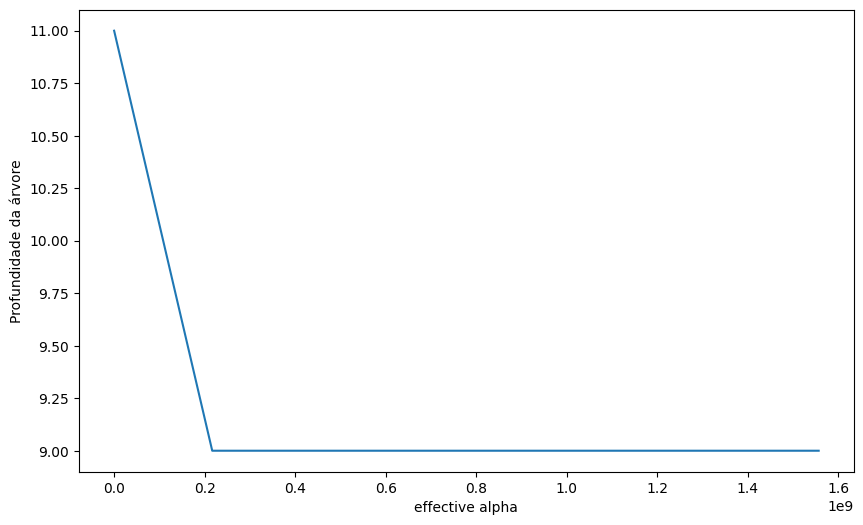

In [15]:
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [16]:
final_tree = DecisionTreeRegressor(ccp_alpha=0.1, random_state= 0)
final_tree.fit(X_train, y_train)

print(f'Profundide da arvore: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de teste: {final_tree.score(X_test, y_test):2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundide da arvore: 11
R-quadrado na base de teste: 0.358060
MSE na base de testes: 8716350147.97


### 7. Visualize esta árvore.

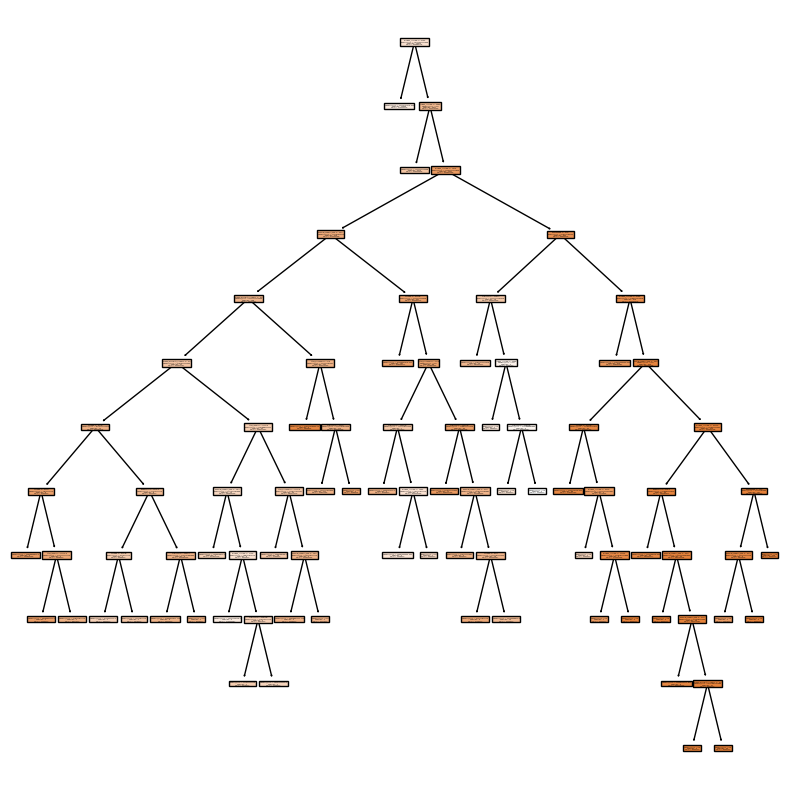

In [17]:
plt.rc('figure', figsize= (10, 10))
tp = plot_tree(final_tree,
               feature_names= X.columns,
               filled= True)